In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

Using the MNIST dataset built into keras

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

We use matplotlib to visualise the Data

C:\Users\user\AppData\Local\Temp/ipykernel_6480/2308501981.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


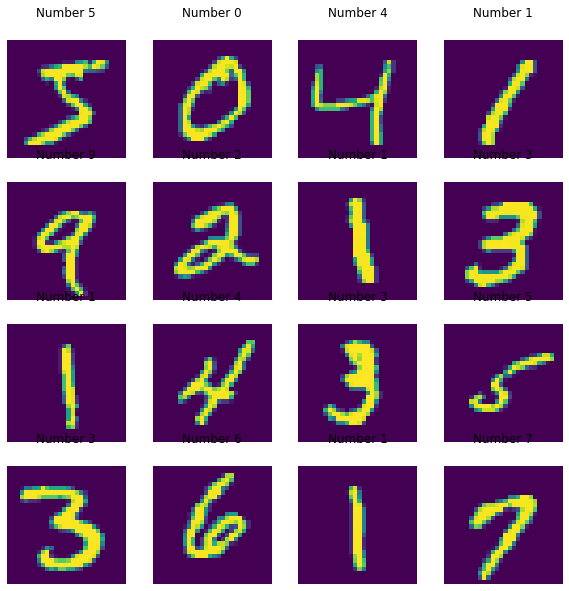

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axis=plt.subplots(4,4,figsize=(10,10))
for i,ax in enumerate(axis.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()


  Reshaping the training and testing data into 4 dimension to work with keras API (greyscale image) 

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)#1 indicates greyscale

Normalizing the data so that the values are between 0 and 1

In [5]:
x_train=x_train.astype('float32')#converts the entire pandas dataframe into the same data type
x_test=x_test.astype('float32')
x_train-=x_train/255
x_test/=255
print("No of images in x_train",x_train.shape[0])
print("No of images in x_test",x_test.shape[0])

No of images in x_train 60000
No of images in x_test 10000


Building the Model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Training the model

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1091 - accuracy: 0.9671
Epoch 2/2
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1682 - accuracy: 0.9486


Evaluating the model

In [41]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.1815 - accuracy: 0.9452


[0.1814851462841034, 0.9452000260353088]

Making Predictions using the model

In [42]:
predictions = model.predict(x_test)

In [43]:
np.argmax(predictions[6])

4

In [44]:
y_test[6]

4